## This notebook benchmarks the functions used to calculate fo2 and Fe3FeT from each other
- The benchmark is relative to MELTS, however, there are actually 2 implementations in different versions of MELTS as well, so the benchmark isn't perfect (e.g. MELTS excel vs. MELTS thermoengine give different values)

In [39]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Comparison 1: Single liquid, specific log fo2

In [40]:
# Make an example liquid with no H2O, 
myLiquids1_noH=pd.DataFrame(data={
                            "Sample_ID_Liq": 0,
                            "SiO2_Liq": 51,
                            "TiO2_Liq": 0.86,
                            "Al2O3_Liq": 16.3,
                            "FeOt_Liq": 11.3,
                            "MnO_Liq": 0.16,
                            "MgO_Liq": 8.3,
                            "CaO_Liq": 9.95,
                            "Na2O_Liq": 1.8,
                            "K2O_Liq": 0.34,
                            "Cr2O3_Liq": 0,
                            "P2O5_Liq": 0,
                            "H2O_Liq": 0,
                          "Fe3Fet_Liq":0,
}, index=[0])



### Dry liquids, specified logfo2, calculate Fe3FeT

In [41]:
logfo2=-7.58429552677443

#  Using Kress 1991, with renormalization of Fe2O3 and FeO
myLiquids_Fe3_Kress_norm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)

#  Using Kress 1991, with no renormalization
myLiquids_Fe3_Kress_no_norm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=False)

# Using Putirka (2018) equation 6b
myLiquids_Fe3_Put_norm=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_noH, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Put2016_eq6b")

- MELTS for excel gives Fe3Fet=0.170535, e.g. Match to 3rd sf, likely results from changes to how renormalizatoin is done?

In [42]:
myLiquids_Fe3_Kress_no_norm['Fe3Fet_Liq']

0    0.170454
Name: Fe3Fet_Liq, dtype: float64

In [43]:
myLiquids_Fe3_Kress_norm['Fe3Fet_Liq']

0    0.170454
Name: Fe3Fet_Liq, dtype: float64

In [44]:
myLiquids_Fe3_Put_norm['Fe3Fet_Liq']

0    0.19554
Name: Fe3Fet_Liq, dtype: float64

- The functions also return all oxides, you can see the difference between norm and renorm..., renorm adjusts the contents of the input oxides slightly so it all sums to 100 after Fe is repartitioned, no norm doesn't

In [45]:
print('no Norm')
display(myLiquids_Fe3_Kress_no_norm)
print('Norm')
display(myLiquids_Fe3_Kress_norm)


no Norm


,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,FeO_Liq,Fe2O3_Liq,XFe3Fe2
0,0,51,0.86,16.3,11.3,0.16,8.3,9.95,1.8,0.34,0,0,0,0.170454,9.352091,2.135643,0.102796


Norm


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq
0,50.891156,0.858169,16.265294,2.135856,9.353027,0.159659,8.282327,9.928814,1.796167,0.339276,0.0,0.170454


### Wet liquid, specified logfo2, calculate Fe3FeT

In [46]:
myLiquids1_H=pd.DataFrame(data={
                            "Sample_ID_Liq": 0,
                            "SiO2_Liq": 51,
                            "TiO2_Liq": 0.86,
                            "Al2O3_Liq": 16.3,
                            "FeOt_Liq": 11.3,
                            "MnO_Liq": 0.16,
                            "MgO_Liq": 8.3,
                            "CaO_Liq": 9.95,
                            "Na2O_Liq": 1.8,
                            "K2O_Liq": 0.34,
                            "Cr2O3_Liq": 0,
                            "P2O5_Liq": 0,
                            "H2O_Liq": 10,
                          "Fe3Fet_Liq":0}, index=[0])

logfo2=-7.58429552677443

In [47]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=True)

myLiquids_Fe3_Kress_no_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2=10**logfo2, model="Kress1991", renorm=False)

### Comparison to MELTS for Excel

In [48]:
print('Thermobar')
myLiquids_Fe3_Kress_no_norm_H['Fe3Fet_Liq'].values

Thermobar


array([0.16785331])

- MELTS gives 0.167....(see cell C9 in screenshot)
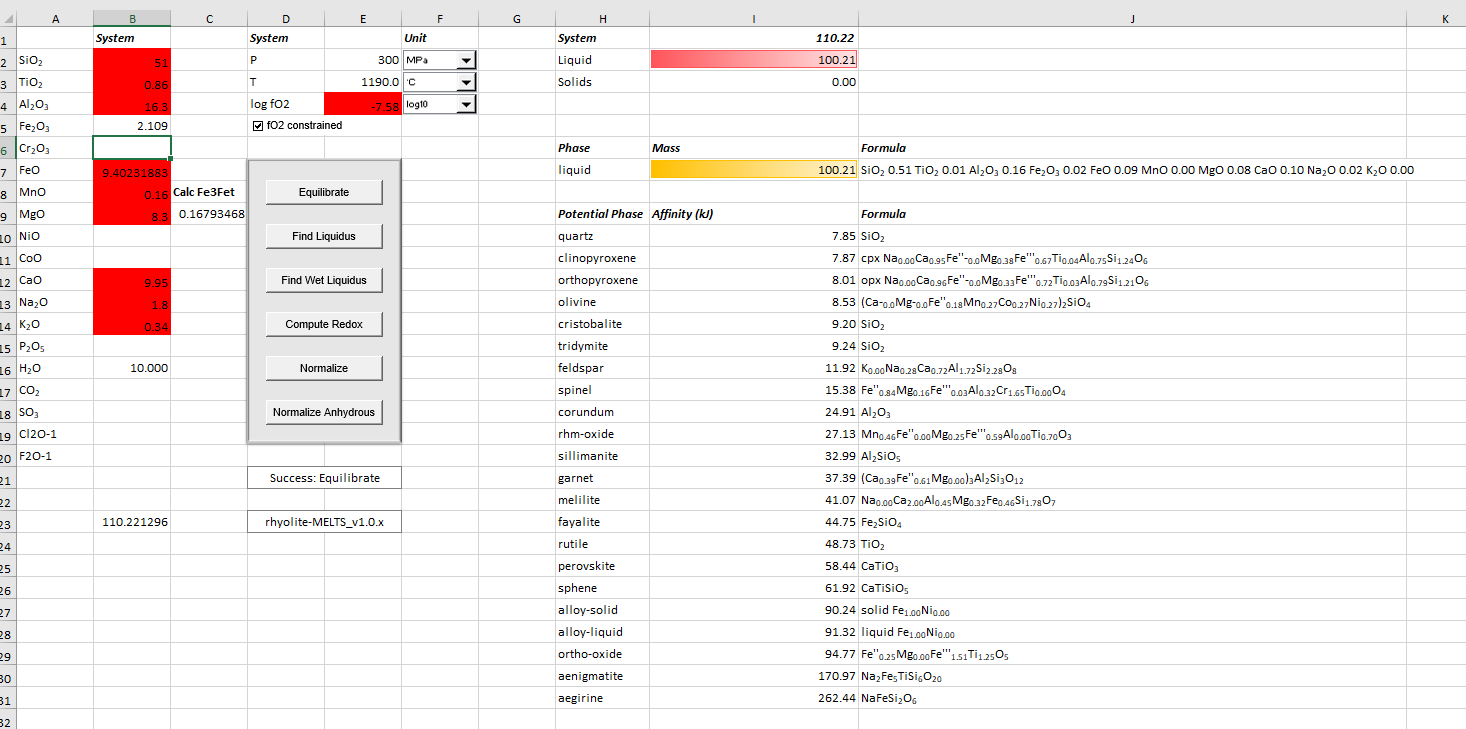

## Comparison 2: Calculating Fe3FeT at QFM
- The benchmark isn't as good, because MELTS for excel is using a different buffer (Myers and Eugster, 1983 with a correction for pressure from frost), whereas we use frost (which is what MELTS in thermoengine uses)

In [49]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="QFM", model="Kress1991", renorm=True)
print('Thermobar')
myLiquids_Fe3_Kress_norm_H['Fe3Fet_Liq'].values

Thermobar


array([0.1329553])

- MELTS for Excel
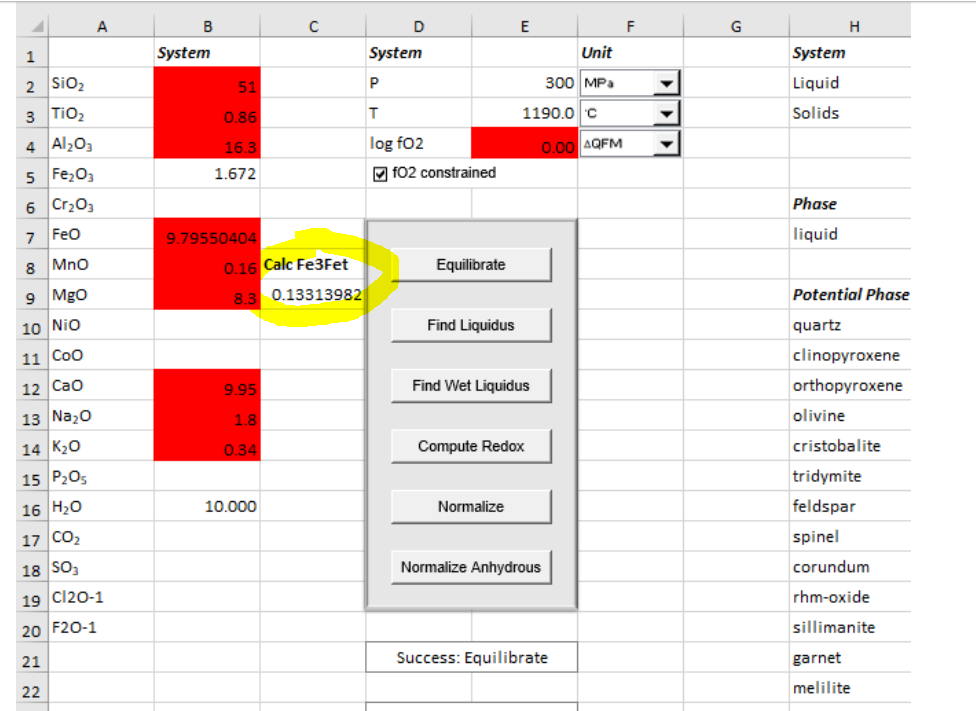

### Lets show these different buffers

Text(0, 0.5, 'log fo2')

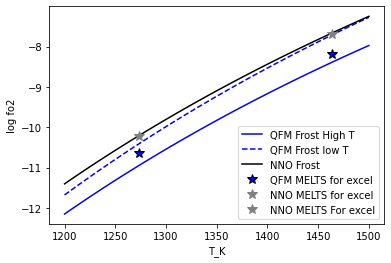

In [50]:
T_lin=np.linspace(1200, 1500)
P_kbar=3
# This is the frost buffer  (high T)
logfo2_QFM=(-25096.3/T_lin) + 8.735 + 0.11 * ((1000*P_kbar/10)-1)/T_lin
# This is the frost buffer l (Low T)
logfo2_QFM_lowT=(-26455.3/T_lin) + 10.344 + 0.092 * ((1000*P_kbar/10)-1)/T_lin
# This is the NNO position
logfo2_NNO=(-24930/T_lin) + 9.36 + 0.046 * ((1000*P_kbar/10)-1)/T_lin
plt.plot(T_lin, logfo2_QFM, '-b', label='QFM Frost High T')
plt.plot(T_lin, logfo2_QFM_lowT, '--b', label='QFM Frost low T')
plt.plot(T_lin, logfo2_NNO, '-k', label='NNO Frost')

# These are buffe rpositions form MELTS for excel
plt.plot(1190+273.15, -8.18952021323856, '*k', mfc='blue', ms=10, label='QFM MELTS for excel')
plt.plot(1190+273.15, -7.67858114342344, '*', ms=10, color='grey', label='NNO MELTS for excel')
plt.plot(1000+273.15, -10.6488603071123, '*k', mfc='blue', ms=10)
plt.plot(1000+273.15, -10.2213533362133,  '*', color='grey', ms=10, label='NNO MELTS For excel')

plt.legend()
plt.xlabel('T_K')
plt.ylabel('log fo2')

## Comparison 3: Calculating Fe3FeT at QFM+1

In [51]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="QFM", fo2_offset=1,
                                            model="Kress1991", renorm=False)
myLiquids_Fe3_Kress_norm_H['Fe3Fet_Liq']

0    0.194071
Name: Fe3Fet_Liq, dtype: float64

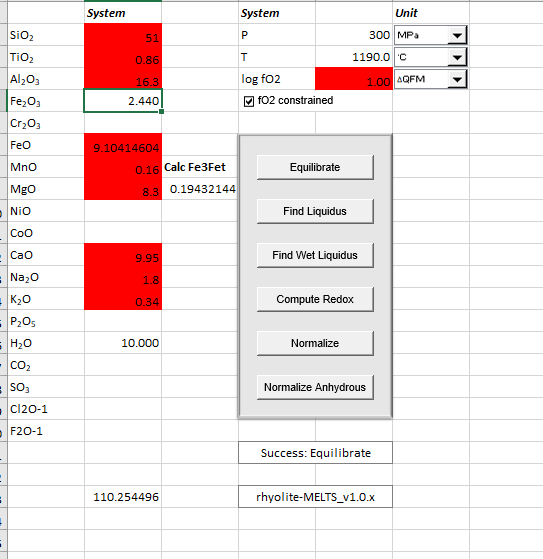

## Comparison 3: Calculation at NNO
- Close match to the 5th decimal place for logfo2, similar Fe3Fet value, e.g. MELTS NNO is closer to thermobar than QFM

In [52]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=0, model="Kress1991", 
                                         renorm=False)
myLiquids_Fe3_Kress_norm_H['Fe3Fet_Liq']

0    0.167853
Name: Fe3Fet_Liq, dtype: float64

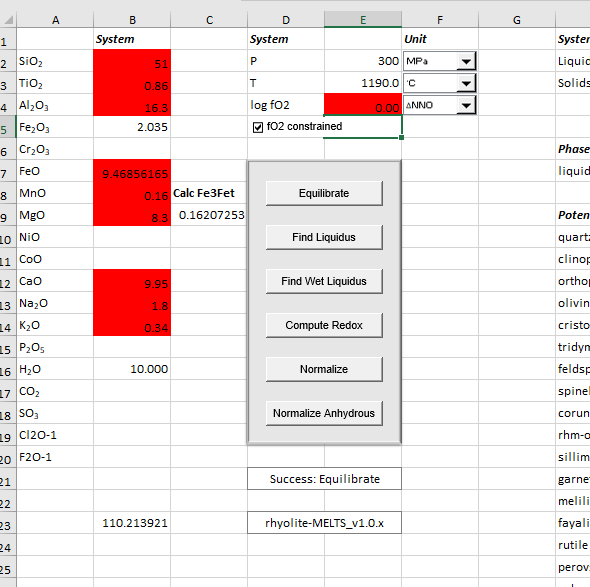

## Comparison 4: NNO+5

In [54]:
myLiquids_Fe3_Kress_norm_H=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1_H, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=5, model="Kress1991", renorm=False)
myLiquids_Fe3_Kress_norm_H['Fe3Fet_Liq']

0    0.658275
Name: Fe3Fet_Liq, dtype: float64

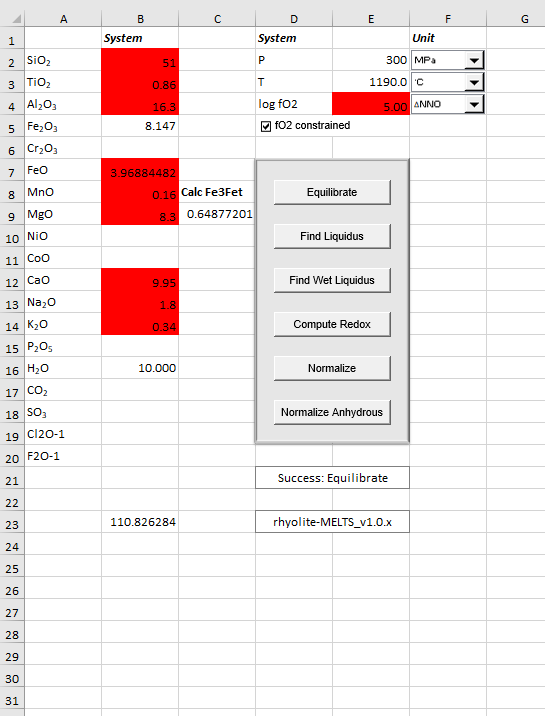